In [18]:
import pandas as pd
import numpy as np 
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
sns.set()

import nltk
# nltk.download('tagsets')

In [19]:
df = pd.read_csv(r'C:\Users\marti\Job Description Analysis\data\df_description_processed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Description         5379 non-null   object
 1   lower_description   5379 non-null   object
 2   word_tokenized      5379 non-null   object
 3   sentence_tokenized  5379 non-null   object
 4   word_count          5379 non-null   int64 
 5   sentence_count      5379 non-null   int64 
 6   clean_words         5379 non-null   object
 7   clean_stemmed       5379 non-null   object
 8   clean_lemmed        5379 non-null   object
dtypes: int64(2), object(7)
memory usage: 378.3+ KB


In [20]:
# duplicates reduce the df by 651 observations
df.drop_duplicates(inplace = True)
df.shape

(4728, 9)

In [21]:
df.head()

,Description,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words,clean_stemmed,clean_lemmed
0,"POSITION SUMMARY, The Business Analyst role is...","position summary, the business analyst role is...","['position', 'summary', 'the', 'business', 'an...","['POSITION SUMMARY, The Business Analyst role ...",424,25,"['position', 'summary', 'business', 'analyst',...","['posit', 'summari', 'busi', 'analyst', 'role'...","['position', 'summary', 'business', 'analyst',..."
1,"What do we need?, You to have an amazing perso...","what do we need?, you to have an amazing perso...","['what', 'do', 'we', 'need', 'you', 'to', 'hav...","['What do we need?, You to have an amazing per...",286,10,"['need', 'amazing', 'personality', 'communicat...","['need', 'amaz', 'person', 'commun', 'style', ...","['need', 'amazing', 'personality', 'communicat..."
2,"Validate, analyze, and conduct statistical ana...","validate, analyze, and conduct statistical ana...","['validate', 'analyze', 'and', 'conduct', 'sta...","['Validate, analyze, and conduct statistical a...",314,24,"['validate', 'analyze', 'conduct', 'statistica...","['valid', 'analyz', 'conduct', 'statist', 'ana...","['validate', 'analyze', 'conduct', 'statistica..."
3,"Full time, Washington, DC metro area, Starting...","full time, washington, dc metro area, starting...","['full', 'time', 'washington', 'dc', 'metro', ...","['Full time, Washington, DC metro area, Starti...",297,13,"['full', 'time', 'washington', 'dc', 'metro', ...","['full', 'time', 'washington', 'dc', 'metro', ...","['full', 'time', 'washington', 'dc', 'metro', ..."
4,Assist in consultations with business partners...,assist in consultations with business partners...,"['assist', 'in', 'consultations', 'with', 'bus...",['Assist in consultations with business partne...,316,7,"['assist', 'consultations', 'business', 'partn...","['assist', 'consult', 'busi', 'partner', 'inte...","['assist', 'consultation', 'business', 'partne..."


# Parts of Speech Tagging (POS)

In [22]:
def pos_series(keyword):
    '''categorizes parts of speech after tokenizing words with POS tags'''
    tokens = nltk.word_tokenize(keyword)
    tagged = nltk.pos_tag(tokens)
    return tagged

In [23]:
# cell runs slower due to computational exhaustion
pos_tagged_arrs = df.lower_description.apply(pos_series)

In [24]:
# unloads the tuples from the tree object for easier manipulation
pos_tagged = []
for row in pos_tagged_arrs.values:
    for element in row:
        pos_tagged.append(element)

In [25]:
# dataframe contains all of the words with their corresponding pos tag;
pos_df = pd.DataFrame(pos_tagged, columns = ('word','POS'))
# special chars were removed due to irrelevance as a tag but will be included in regex
char_removal = [',', '.', ':', '#', '$', '\'\'', '``', '(', ')']
drop_indices = (pos_df.loc[pos_df.POS.isin(char_removal)].index)
pos_df.drop(drop_indices, inplace = True)

In [26]:
# frequency of the unique pos tags within the dataset
pos_sum = pos_df.groupby('POS').count() # group by POS tags
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

,word
POS,
NN,518276
NNS,264824
JJ,228648
IN,186737
CC,137941
DT,92560
VB,87803
VBG,64458
TO,57669


In [27]:
# takes a random sample and shows structure of array along with how each is tagged
sample = df.lower_description.sample(5)
samples = []
for doc in sample:
    tokens = nltk.word_tokenize(doc)
    samples.append(nltk.pos_tag(tokens))
    
samples[2]

[('demonstrated', 'JJ'),
 ('expertise', 'NN'),
 ('in', 'IN'),
 ('computer', 'NN'),
 ('science', 'NN'),
 ('and', 'CC'),
 ('statistics', 'NNS'),
 ('.', '.'),
 ('strong', 'JJ'),
 ('working', 'VBG'),
 ('knowledge', 'NN'),
 ('of', 'IN'),
 ('basic', 'JJ'),
 ('statistical', 'JJ'),
 ('concepts', 'NNS'),
 ('such', 'JJ'),
 ('as', 'IN'),
 ('point', 'NN'),
 ('estimation', 'NN'),
 (',', ','),
 ('probability', 'NN'),
 ('distributions', 'NNS'),
 (',', ','),
 ('hypothesis', 'NN'),
 ('tests', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('how', 'WRB'),
 ('they', 'PRP'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('applied', 'VBN'),
 ('.', '.'),
 ('ability', 'NN'),
 ('to', 'TO'),
 ('build', 'VB'),
 ('predictive', 'JJ'),
 ('models', 'NNS'),
 (',', ','),
 ('such', 'JJ'),
 ('as', 'IN'),
 ('generalized', 'JJ'),
 ('linear', 'NN'),
 (',', ','),
 ('decision', 'NN'),
 ('tree', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('neural', 'JJ'),
 ('network', 'NN'),
 ('models', 'NNS'),
 ('ability', 'NN'),
 ('to', 'TO'),
 ('perform', 'VB'),
 ('m

# Analyses of POS


In [28]:
# print out of the pos tags for easy reference
for tag in pos_df.POS.unique():
    print(nltk.help.upenn_tagset(tag))

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
None
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
None
VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...
None
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around

In [29]:
# sandbox cell
pos_tagged_arrs[578]

[('cas', 'NN'),
 ('uses', 'VBZ'),
 ('intuitive', 'JJ'),
 ('technology', 'NN'),
 (',', ','),
 ('unparalleled', 'JJ'),
 ('scientific', 'JJ'),
 ('content', 'NN'),
 ('and', 'CC'),
 ('unmatched', 'JJ'),
 ('human', 'JJ'),
 ('expertise', 'NN'),
 ('to', 'TO'),
 ('help', 'VB'),
 ('companies', 'NNS'),
 ('create', 'VB'),
 ('groundbreaking', 'VBG'),
 ('innovations', 'NNS'),
 ('that', 'WDT'),
 ('benefit', 'VBP'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('.', '.'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('scientific', 'JJ'),
 ('information', 'NN'),
 ('solutions', 'NNS'),
 ('division', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('american', 'JJ'),
 ('chemical', 'NN'),
 ('society', 'NN'),
 (',', ','),
 ('cas', 'NN'),
 ('manages', 'VBZ'),
 ('the', 'DT'),
 ('largest', 'JJS'),
 ('curated', 'JJ'),
 ('reservoir', 'NN'),
 ('of', 'IN'),
 ('scientific', 'JJ'),
 ('knowledge', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('for', 'IN'),
 ('111', 'CD'),
 ('years', 'NNS'),
 (',', ','),
 ('has', 'VBZ'),
 ('helped', 'VBN'),
 ('innovators',

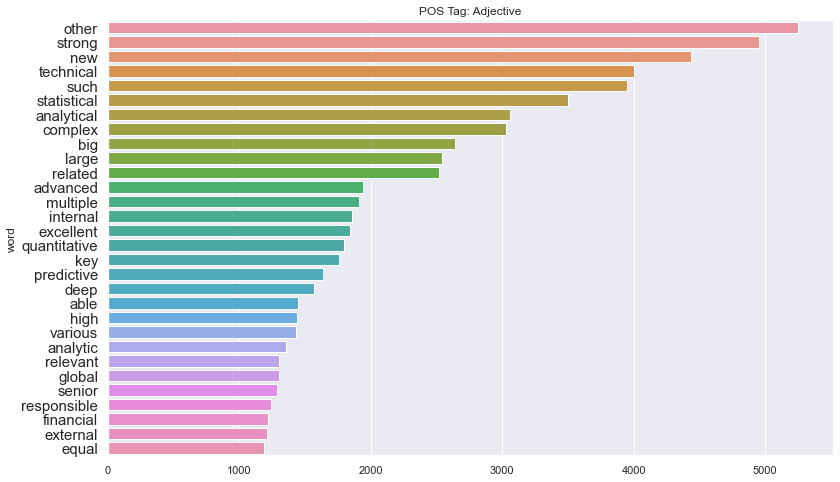

In [30]:
# adjectives
jj_tag = pos_df.loc[pos_df.POS == 'JJ'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
jjbar = sns.barplot(y = jj_tag.index, x = jj_tag.values, orient = 'h')
plt.title('POS Tag: Adjective')
jjbar.set_yticklabels(jjbar.get_yticklabels(), fontsize = 15);

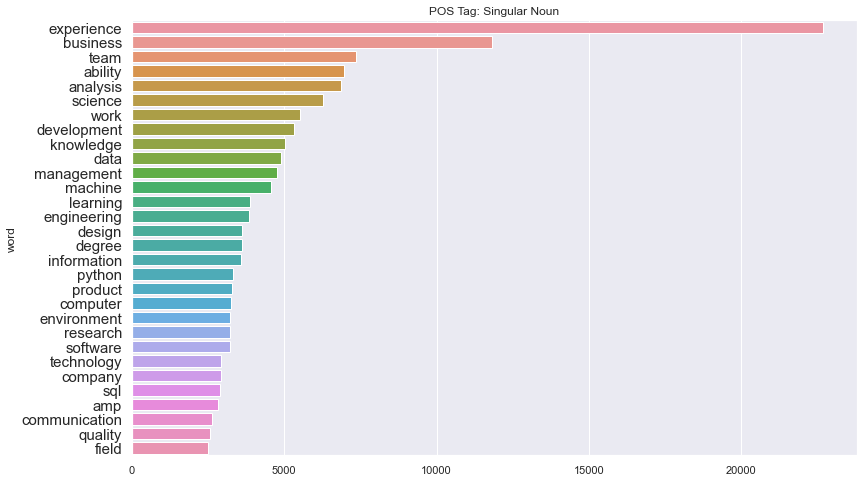

In [31]:
# nouns singular
nn_tag = pos_df.loc[pos_df.POS == 'NN'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
nnbar = sns.barplot(y = nn_tag.index, x = nn_tag.values, orient = 'h')
plt.title('POS Tag: Singular Noun')
nnbar.set_yticklabels(nnbar.get_yticklabels(), fontsize = 15);

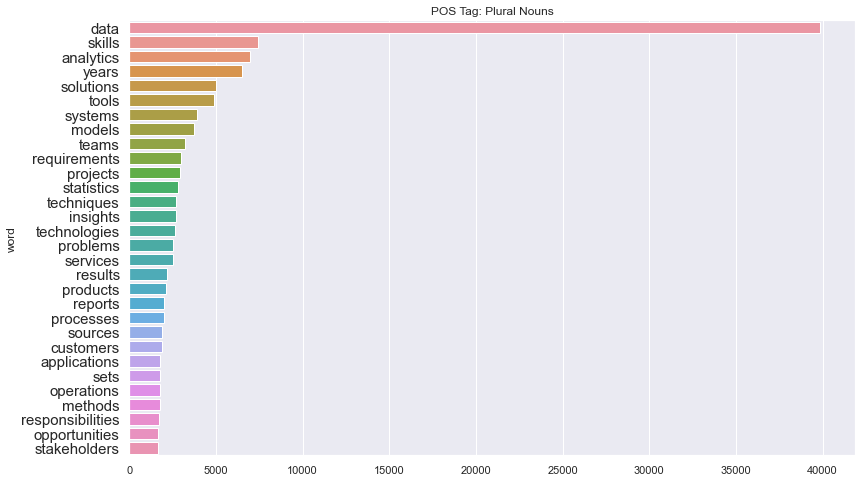

In [33]:
# nouns plural
NNS_tag = pos_df.loc[pos_df.POS == 'NNS'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
NNSbar = sns.barplot(y = NNS_tag.index, x = NNS_tag.values, orient = 'h')
plt.title('POS Tag: Plural Nouns')
NNSbar.set_yticklabels(NNSbar.get_yticklabels(), fontsize = 15);

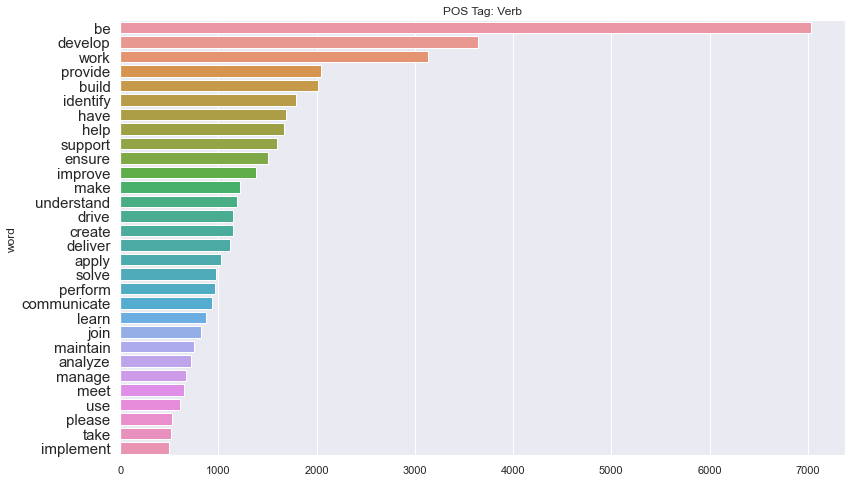

In [34]:
# verb base form 
VB_tag = pos_df.loc[pos_df.POS == 'VB'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBbar = sns.barplot(y = VB_tag.index, x = VB_tag.values, orient = 'h')
plt.title('POS Tag: Verb')
VBbar.set_yticklabels(VBbar.get_yticklabels(), fontsize = 15);

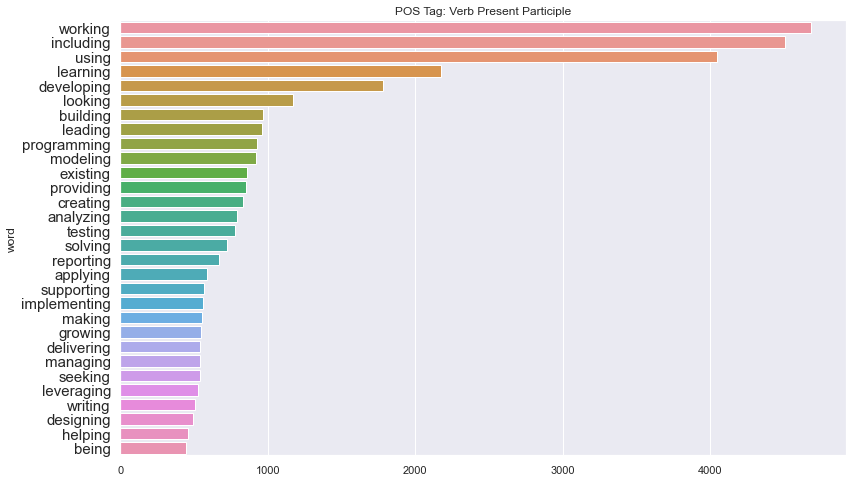

In [35]:
# Verb, present participle
VBG_tag = pos_df.loc[pos_df.POS == 'VBG'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBGbar = sns.barplot(y = VBG_tag.index, x = VBG_tag.values, orient = 'h')
plt.title('POS Tag: Verb Present Participle')
VBGbar.set_yticklabels(VBGbar.get_yticklabels(), fontsize = 15);

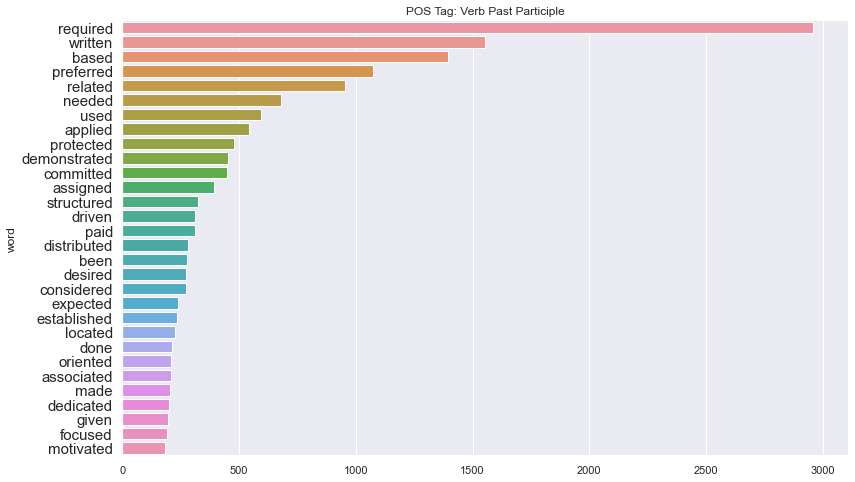

In [36]:
# Verb, past participle
VBN_tag = pos_df.loc[pos_df.POS == 'VBN'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBNbar = sns.barplot(y = VBN_tag.index, x = VBN_tag.values, orient = 'h')
plt.title('POS Tag: Verb Past Participle')
VBNbar.set_yticklabels(VBNbar.get_yticklabels(), fontsize = 15);

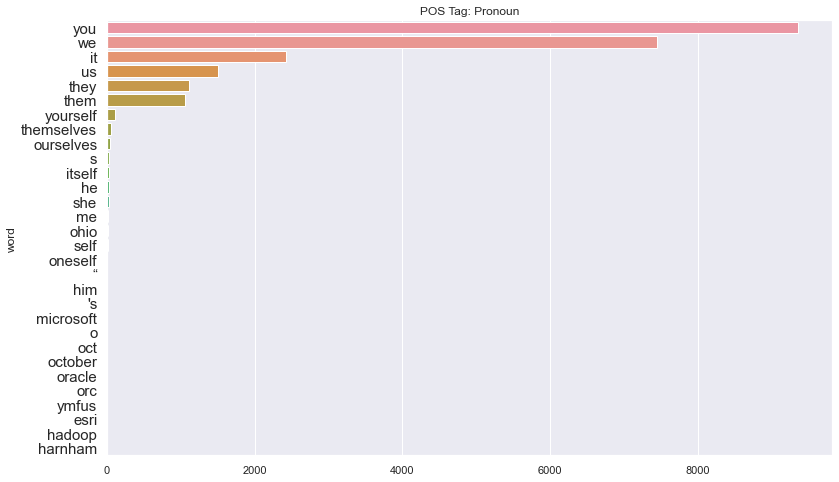

In [37]:
# Personal pronoun
PRP_tag = pos_df.loc[pos_df.POS == 'PRP'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
PRPbar = sns.barplot(y = PRP_tag.index, x = PRP_tag.values, orient = 'h')
plt.title('POS Tag: Pronoun')
PRPbar.set_yticklabels(PRPbar.get_yticklabels(), fontsize = 15);

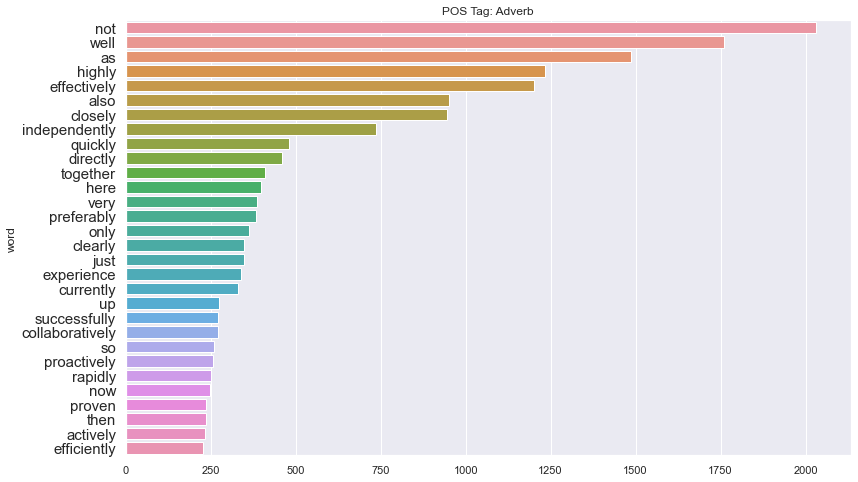

In [38]:
# adverb
RB_tag = pos_df.loc[pos_df.POS == 'RB'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
RBbar = sns.barplot(y = RB_tag.index, x = RB_tag.values, orient = 'h')
plt.title('POS Tag: Adverb')
RBbar.set_yticklabels(RBbar.get_yticklabels(), fontsize = 15);

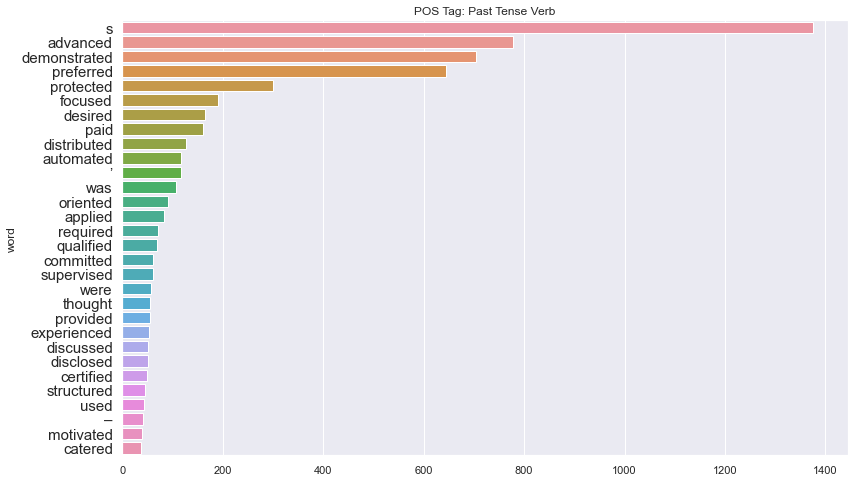

In [39]:
# Verb, past tense
VBD_tag = pos_df.loc[pos_df.POS == 'VBD'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBDbar = sns.barplot(y = VBD_tag.index, x = VBD_tag.values, orient = 'h')
plt.title('POS Tag: Past Tense Verb')
VBDbar.set_yticklabels(VBDbar.get_yticklabels(), fontsize = 15);

C:\Users\marti\Anaconda3\envs\nlp_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\marti\Anaconda3\envs\nlp_env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0, flags=flags)


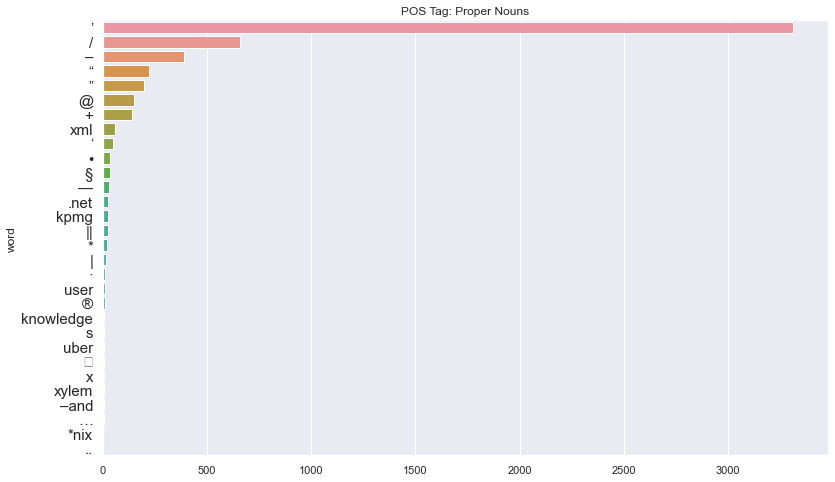

In [40]:
# Proper noun, singular
NNP_tag = pos_df.loc[pos_df.POS == 'NNP'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
NNPbar = sns.barplot(y = NNP_tag.index, x = NNP_tag.values, orient = 'h')
plt.title('POS Tag: Proper Nouns')
NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 15);

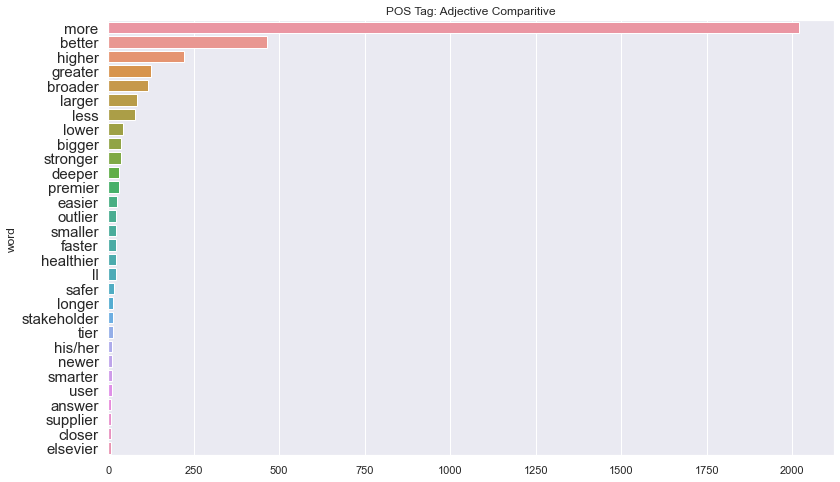

In [41]:
# 	Adjective, comparative
JJR_tag = pos_df.loc[pos_df.POS == 'JJR'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
JJRbar = sns.barplot(y = JJR_tag.index, x = JJR_tag.values, orient = 'h')
plt.title('POS Tag: Adjective Comparitive')
JJRbar.set_yticklabels(JJRbar.get_yticklabels(), fontsize = 15);

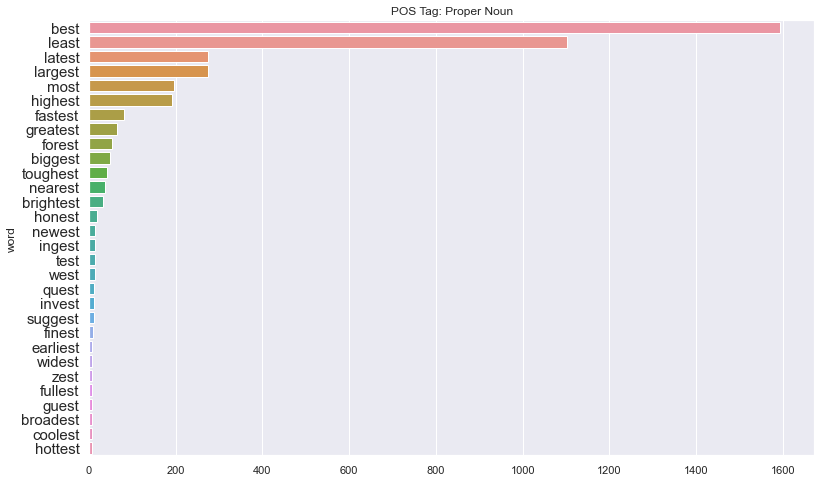

In [42]:
# Proper noun, singular
NNP_tag = pos_df.loc[pos_df.POS == 'JJS'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
NNPbar = sns.barplot(y = NNP_tag.index, x = NNP_tag.values, orient = 'h')
plt.title('POS Tag: Proper Noun')
NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 15);

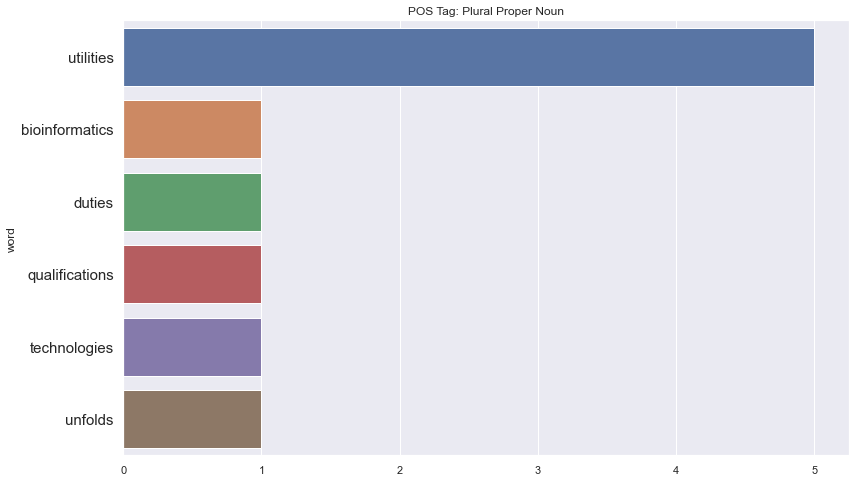

In [43]:
# Proper noun, plural
RB_tag = pos_df.loc[pos_df.POS == 'NNPS'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
RBbar = sns.barplot(y = RB_tag.index, x = RB_tag.values, orient = 'h')
plt.title('POS Tag: Plural Proper Noun')
RBbar.set_yticklabels(RBbar.get_yticklabels(), fontsize = 15);

# Access to Chunking Files

In [45]:
# loaded at the bottom of this page to inspect as needed
chunks1 = pickle.load( open('data/chunks_1.pickle', "rb" ) )
chunks2 = pickle.load( open('data/chunks_2.pickle', "rb" ) )
chunks3 = pickle.load( open('data/chunks_3.pickle', "rb" ) )
chunks4 = pickle.load( open('data/chunks_4.pickle', "rb" ) )

In [46]:
print('Length:', len(chunks1), 'Sample Size:', len(chunks1) * .10)
print('Length:', len(chunks2), 'Sample Size:', len(chunks2) * .10) 
print('Length:', len(chunks3), 'Sample Size:', len(chunks3) * .10)
print('Length:', len(chunks4), 'Sample Size:', len(chunks4) * .10)

Length: 577364 Sample Size: 57736.4
Length: 615100 Sample Size: 61510.0
Length: 248914 Sample Size: 24891.4
Length: 34739 Sample Size: 3473.9


In [57]:
# shows format of the observations within the chunks files
chunks3[12345]

LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('VS', [('are', 'VBP')])